In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
%load_ext autoreload
%autoreload 2
%run '../main.py'

In [3]:
dataSetOps = DataSetOps()

dataSetOps.import_years(2010, 2017)

dataSetOps.prepare()
dataSetOps.prepare2(10)

df = dataSetOps.df

In [4]:
df['value_nr'] = df['value_is_down']
print(len(df))
print(len(df[df.value_nr]))
df['fclass_1'] = (df['mavg10'] > 0) & (df['mavg20'] > 15) & (df['mavg100'] > 5) & (df['mavg1000'] > 5)
df = df[df['fclass_1']]

prob = len(df[df.value_nr]) / len(df)

print(len(df))
print(len(df[df.value_nr]))

2935000
186988
19789
5357


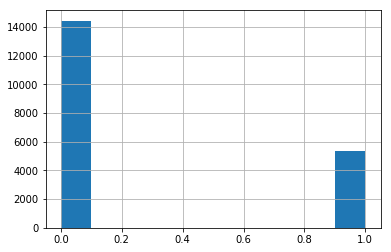

In [5]:
df.value_nr.astype(int).hist()

In [6]:
X = df[['value_d', 'mavg10', 'mavg20', 'mavg100', 'mavg1000']]
Y = df['value_nr']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

#Initializing Neural Network
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu', input_dim = 5))
# Adding the second hidden layer
classifier.add(Dense(output_dim = 64, init = 'uniform', activation = 'relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling Neural Network
from keras import metrics
metric_names = [metrics.mae]
classifier.compile(optimizer='adam', loss = 'mean_squared_error', metrics=metric_names)

# Fitting our model 
classifier.fit(X_train, y_train, batch_size = 1, epochs = 500)

/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=5, units=64, kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=64, kernel_initializer="uniform")`
  if sys.path[0] == '':
/home/taleh/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


Epoch 1/500
15831/15831 [==============================] - 6s 407us/step - loss: 0.1941 - mean_absolute_error: 0.3861
Epoch 2/500
15831/15831 [==============================] - 6s 400us/step - loss: 0.1921 - mean_absolute_error: 0.3833
Epoch 3/500
15831/15831 [==============================] - 6s 399us/step - loss: 0.1914 - mean_absolute_error: 0.3811
Epoch 4/500
15831/15831 [==============================] - 6s 399us/step - loss: 0.1911 - mean_absolute_error: 0.3814
Epoch 5/500
15831/15831 [==============================] - 6s 401us/step - loss: 0.1907 - mean_absolute_error: 0.3804
Epoch 6/500
15831/15831 [==============================] - 6s 401us/step - loss: 0.1907 - mean_absolute_error: 0.3795
Epoch 7/500
15831/15831 [==============================] - 6s 400us/step - loss: 0.1907 - mean_absolute_error: 0.3803
Epoch 8/500
15831/15831 [==============================] - 6s 401us/step - loss: 0.1902 - mean_absolute_error: 0.3797
Epoch 9/500
15831/15831 [==============================]

15831/15831 [==============================] - 6s 387us/step - loss: 0.1860 - mean_absolute_error: 0.3693
Epoch 70/500
15831/15831 [==============================] - 6s 386us/step - loss: 0.1855 - mean_absolute_error: 0.3687
Epoch 71/500
15831/15831 [==============================] - 6s 391us/step - loss: 0.1857 - mean_absolute_error: 0.3696
Epoch 72/500
15831/15831 [==============================] - 6s 389us/step - loss: 0.1855 - mean_absolute_error: 0.3678
Epoch 73/500
15831/15831 [==============================] - 6s 388us/step - loss: 0.1853 - mean_absolute_error: 0.3683
Epoch 74/500
15831/15831 [==============================] - 6s 389us/step - loss: 0.1856 - mean_absolute_error: 0.3688
Epoch 75/500
15831/15831 [==============================] - 6s 387us/step - loss: 0.1857 - mean_absolute_error: 0.3691
Epoch 76/500
15831/15831 [==============================] - 6s 387us/step - loss: 0.1849 - mean_absolute_error: 0.3684
Epoch 77/500
15831/15831 [==============================] - 6

15831/15831 [==============================] - 6s 382us/step - loss: 0.1829 - mean_absolute_error: 0.3618
Epoch 138/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1831 - mean_absolute_error: 0.3620
Epoch 139/500
15831/15831 [==============================] - 6s 381us/step - loss: 0.1829 - mean_absolute_error: 0.3619
Epoch 140/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1827 - mean_absolute_error: 0.3614
Epoch 141/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1829 - mean_absolute_error: 0.3611
Epoch 142/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1828 - mean_absolute_error: 0.3617
Epoch 143/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1829 - mean_absolute_error: 0.3619
Epoch 144/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1827 - mean_absolute_error: 0.3617
Epoch 145/500
15831/15831 [===========================

15831/15831 [==============================] - 6s 381us/step - loss: 0.1823 - mean_absolute_error: 0.3596
Epoch 206/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1826 - mean_absolute_error: 0.3596
Epoch 207/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1821 - mean_absolute_error: 0.3596
Epoch 208/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1820 - mean_absolute_error: 0.3599
Epoch 209/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1820 - mean_absolute_error: 0.3591
Epoch 210/500
15831/15831 [==============================] - 6s 383us/step - loss: 0.1823 - mean_absolute_error: 0.3603
Epoch 211/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1815 - mean_absolute_error: 0.3582
Epoch 212/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1822 - mean_absolute_error: 0.3602
Epoch 213/500
15831/15831 [===========================

15831/15831 [==============================] - 6s 383us/step - loss: 0.1808 - mean_absolute_error: 0.3559
Epoch 274/500
15831/15831 [==============================] - 6s 384us/step - loss: 0.1812 - mean_absolute_error: 0.3567
Epoch 275/500
15831/15831 [==============================] - 6s 384us/step - loss: 0.1813 - mean_absolute_error: 0.3565
Epoch 276/500
15831/15831 [==============================] - 6s 384us/step - loss: 0.1811 - mean_absolute_error: 0.3567
Epoch 277/500
15831/15831 [==============================] - 6s 383us/step - loss: 0.1805 - mean_absolute_error: 0.3558
Epoch 278/500
15831/15831 [==============================] - 6s 384us/step - loss: 0.1805 - mean_absolute_error: 0.3561
Epoch 279/500
15831/15831 [==============================] - 6s 384us/step - loss: 0.1808 - mean_absolute_error: 0.3556
Epoch 280/500
15831/15831 [==============================] - 6s 384us/step - loss: 0.1808 - mean_absolute_error: 0.3565
Epoch 281/500
15831/15831 [===========================

15831/15831 [==============================] - 6s 390us/step - loss: 0.1801 - mean_absolute_error: 0.3544
Epoch 342/500
15831/15831 [==============================] - 6s 389us/step - loss: 0.1799 - mean_absolute_error: 0.3544
Epoch 343/500
15831/15831 [==============================] - 6s 390us/step - loss: 0.1801 - mean_absolute_error: 0.3539
Epoch 344/500
15831/15831 [==============================] - 6s 390us/step - loss: 0.1804 - mean_absolute_error: 0.3545
Epoch 345/500
15831/15831 [==============================] - 6s 390us/step - loss: 0.1801 - mean_absolute_error: 0.3549
Epoch 346/500
15831/15831 [==============================] - 6s 389us/step - loss: 0.1810 - mean_absolute_error: 0.3550
Epoch 347/500
15831/15831 [==============================] - 6s 389us/step - loss: 0.1801 - mean_absolute_error: 0.3540
Epoch 348/500
15831/15831 [==============================] - 6s 390us/step - loss: 0.1799 - mean_absolute_error: 0.3541
Epoch 349/500
15831/15831 [===========================

15831/15831 [==============================] - 6s 381us/step - loss: 0.1794 - mean_absolute_error: 0.3535
Epoch 410/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1801 - mean_absolute_error: 0.3531
Epoch 411/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1802 - mean_absolute_error: 0.3541
Epoch 412/500
15831/15831 [==============================] - 6s 381us/step - loss: 0.1799 - mean_absolute_error: 0.3533
Epoch 413/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1800 - mean_absolute_error: 0.3540
Epoch 414/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1798 - mean_absolute_error: 0.3533
Epoch 415/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1797 - mean_absolute_error: 0.3531
Epoch 416/500
15831/15831 [==============================] - 6s 383us/step - loss: 0.1802 - mean_absolute_error: 0.3536
Epoch 417/500
15831/15831 [===========================

15831/15831 [==============================] - 6s 382us/step - loss: 0.1794 - mean_absolute_error: 0.3523
Epoch 478/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1799 - mean_absolute_error: 0.3527
Epoch 479/500
15831/15831 [==============================] - 6s 381us/step - loss: 0.1798 - mean_absolute_error: 0.3524
Epoch 480/500
15831/15831 [==============================] - 6s 381us/step - loss: 0.1801 - mean_absolute_error: 0.3535
Epoch 481/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1795 - mean_absolute_error: 0.3523
Epoch 482/500
15831/15831 [==============================] - 6s 381us/step - loss: 0.1796 - mean_absolute_error: 0.3528
Epoch 483/500
15831/15831 [==============================] - 6s 381us/step - loss: 0.1795 - mean_absolute_error: 0.3520
Epoch 484/500
15831/15831 [==============================] - 6s 382us/step - loss: 0.1794 - mean_absolute_error: 0.3520
Epoch 485/500
15831/15831 [===========================

In [ ]:
# Creating the Confusion Matrix
from sklearn.metrics import confusion_matrix
from lib.helper import AccuracyCalculator

# Predicting the Test set results
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, (y_pred > 0.5))

AccuracyCalculator.class_accuracy(cm)
AccuracyCalculator.optimistic_accuracy(y_pred[:,0], y_test, 100)
risk_hist_df = AccuracyCalculator.risk_hist(y_pred[:,0], y_test)


In [ ]:
risk_hist_df.risk.plot()

In [ ]:
prob

In [ ]:
cm